# Project: Wrangling and Analyze Data

In [1]:
# Import neccessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json
from pandas import json_normalize
from PIL import Image
from io import BytesIO

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
with open("tweet_json.txt", "r") as f:
    data = f.readlines()
    data = [json.loads(d) for d in data]

In [5]:
with open('re_processed_tweet.json', 'w') as f:
    json.dump(data, f)

In [6]:
tweet_json = pd.read_json('re_processed_tweet.json')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
twitter_archive.shape

(2356, 17)

In [11]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predictions.shape

(2075, 12)

In [16]:
tweet_json.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [17]:
tweet_json.tail(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2353,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2535,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [18]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [19]:
tweet_json.shape

(2354, 31)

In [20]:
tweet_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


### Quality issues
##### twitter_archive
1. Missing data:in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, text and source. They should be droped
2. Name column has inconsistent format. Sentence and lowercase.
3. Inaccurate timestamp format. Timestamp and not object
4. unconventional names in name column (a, such, this etc.)
5. Puppo are also known as puppers. Also, doggo	are floofer. As such, duplicate columns.

##### image_predictions
6. Unnecessary jpg_url column.
7. Inconsistent formats: p1,p2,p3.
8. columns repition: p1,p2,p3,p1_conf,p2_conf,p3_conf,p1_dog,p2_dog,p3_dog.

##### tweet_json
9. retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name.
10. display_text_range has multiple values

### Tidiness issues
##### twitter_archive
1. timestamp has multiple values: Time and date.

#### tweet_json
2. created_at has multiple values: time and date
3. display_text_range has multiple values

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1:
#### Missing data:in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, text and source. They should be droped

#### Define:
Drop missing columns in twitter_archive dataset using drop function

#### Code

In [22]:
# Dropping missing and irrelevant colums
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'text', 'source'], inplace=True, axis=1)

#### Test

In [23]:
twitter_archive_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,12,10,Franklin,None,None,None,None


### Issue #2: Name column has inconsistent format. Sentence and lowercase.

#### Define:
Change the name column to lowercase

#### Code

In [24]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].str.lower()

#### Test

In [25]:
twitter_archive_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,12,10,archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,13,10,darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,12,10,franklin,None,None,None,None


### Issue #3: Inaccurate timestamp format. Timestamp and not object

#### Define:
Change timestamp format to datetime

#### Code

In [26]:
# Splitting the datetime column into separate columns: date and time
twitter_archive_clean['date'] = pd.to_datetime(twitter_archive_clean['timestamp']).dt.date
twitter_archive_clean['time'] = pd.to_datetime(twitter_archive_clean['timestamp']).dt.time

# Drop the datetime columns since we have splitted it to get two separate columns
twitter_archive_clean.drop(['timestamp'], inplace=True, axis=1)

# Converting date to datetime format
twitter_archive_clean['date'] = pd.to_datetime(twitter_archive_clean['date'])

# Dropping the time column as it's uneccessary
twitter_archive_clean.drop(['time'], inplace=True, axis=1)

#### Test

In [27]:
twitter_archive_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date
0,892420643555336193,13,10,phineas,None,None,None,None,2017-08-01
1,892177421306343426,13,10,tilly,None,None,None,None,2017-08-01
2,891815181378084864,12,10,archie,None,None,None,None,2017-07-31
3,891689557279858688,13,10,darla,None,None,None,None,2017-07-30
4,891327558926688256,12,10,franklin,None,None,None,None,2017-07-29


### Issue #4: unconventional names in name column (a, such, this etc.)

#### Define:
A list of dictionary of unconvention names are declared which is used to verify what is available in the dataset with which unconventional names are to be removed from the table.

#### Code

In [28]:
values = ['a','bo', 'an','my', 'jd', 'by', 'all','al', 'mo','jo','ed','o','none','this','such','mad','quite','very','not','one']
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.name.isin(values) == False]

#### Test

In [29]:
twitter_archive_clean["name"].value_counts() #counting values in cast column

charlie       12
oliver        11
lucy          11
cooper        11
penny         10
              ..
aqua           1
chase          1
rorie          1
simba          1
christoper     1
Name: name, Length: 937, dtype: int64

### Issue #5: Puppo are also known as puppers. Also, doggo	are floofer. As such, duplicate columns.

#### Define:
Drop repeted columns for puppers and floofer

#### Code

In [30]:
twitter_archive_clean_1 = pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'rating_numerator', 'rating_denominator',
                                                                  'name', 'date'], var_name='dog_stages', value_name='stage_level')

In [31]:
# write to a file
twitter_archive_clean_1.to_csv('twitter_archive_cleaned.csv', index=False)

#### Test

In [32]:
twitter_archive_clean_1.head()

,tweet_id,rating_numerator,rating_denominator,name,date,dog_stages,stage_level
0,892420643555336193,13,10,phineas,2017-08-01,doggo,None
1,892177421306343426,13,10,tilly,2017-08-01,doggo,None
2,891815181378084864,12,10,archie,2017-07-31,doggo,None
3,891689557279858688,13,10,darla,2017-07-30,doggo,None
4,891327558926688256,12,10,franklin,2017-07-29,doggo,None


In [33]:
twitter_archive_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048 entries, 0 to 6047
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            6048 non-null   int64         
 1   rating_numerator    6048 non-null   int64         
 2   rating_denominator  6048 non-null   int64         
 3   name                6048 non-null   object        
 4   date                6048 non-null   datetime64[ns]
 5   dog_stages          6048 non-null   object        
 6   stage_level         6048 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 330.9+ KB


In [34]:
twitter_archive_clean_1.describe()

,tweet_id,rating_numerator,rating_denominator
count,6.048000e+03,6048.000000,6048.000000
mean,7.485838e+17,12.090608,10.025132
std,6.874420e+16,45.494476,1.031678
min,6.660586e+17,2.000000,7.000000
25%,6.820193e+17,10.000000,10.000000
50%,7.378132e+17,11.000000,10.000000
75%,8.077164e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,50.000000


In [35]:
twitter_archive_clean_1.tweet_id.value_counts()

892420643555336193    4
694905863685980160    4
693486665285931008    4
693590843962331137    4
693642232151285760    4
                     ..
785639753186217984    4
785872687017132033    4
785927819176054784    4
786036967502913536    4
666058600524156928    4
Name: tweet_id, Length: 1512, dtype: int64

In [36]:
twitter_archive_clean_1.rating_numerator.value_counts()

12      1552
11      1364
10      1152
13       828
9        416
8        304
7        136
14        76
6         68
5         56
3         40
4         20
2         12
75         8
24         4
27         4
1776       4
50         4
Name: rating_numerator, dtype: int64

In [37]:
twitter_archive_clean_1.rating_denominator.value_counts()

10    6036
7        4
50       4
11       4
Name: rating_denominator, dtype: int64

In [38]:
twitter_archive_clean_1.name.value_counts()

charlie       48
oliver        44
lucy          44
cooper        44
penny         40
              ..
aqua           4
chase          4
rorie          4
simba          4
christoper     4
Name: name, Length: 937, dtype: int64

In [39]:
twitter_archive_clean_1.date.value_counts()

2015-11-28    72
2015-11-23    64
2015-12-01    64
2015-11-29    64
2015-12-08    60
              ..
2017-02-26     4
2017-02-27     4
2016-11-14     4
2016-03-26     4
2016-04-06     4
Name: date, Length: 566, dtype: int64

In [40]:
twitter_archive_clean_1.dog_stages.value_counts()

doggo      1512
floofer    1512
pupper     1512
puppo      1512
Name: dog_stages, dtype: int64

In [41]:
twitter_archive_clean_1.stage_level.value_counts()

None       5835
pupper      138
doggo        50
puppo        20
floofer       5
Name: stage_level, dtype: int64

### Issue #6: Unnecessary jpg_url column.

#### Define:
Drop jpg_url as it's not relevant for our analysis

#### Code

In [42]:
# Dropping unneccessary url column
image_predictions_clean.drop(['jpg_url'], inplace=True, axis=1)

#### Test

In [43]:
image_predictions_clean.head()

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #7: Inconsistent formats: p1,p2,p3.

#### Define:
Changing inconsistent formats so as to to ensure uniformity and consistency

#### Code

In [44]:
# Dropping unneccessary url column
image_predictions_clean.p1 = image_predictions_clean.p1.str.lower()
image_predictions_clean.p2 = image_predictions_clean.p2.str.lower()
image_predictions_clean.p3 = image_predictions_clean.p3.str.lower()

#### Test

In [45]:
image_predictions_clean.head()

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #8: columns repetition: p1,p2,p3,p1_conf,p2_conf,p3_conf,p1_dog,p2_dog,p3_dog.

#### Define:
melting 

#### Code

In [46]:
# pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)

# melting p1, p2, p3
image_predictions_clean_1 = pd.melt(image_predictions_clean, id_vars=
                                    ['tweet_id','img_num','p1_conf','p1_dog','p2_conf',
                                     'p2_dog','p3_conf','p3_dog'], var_name='test_level', value_name='animal')
# write to a new file
image_predictions_clean_1.to_csv('image_predictions_clean_1.csv', index=False)

In [47]:
image_predictions_clean_2 = pd.read_csv('image_predictions_clean_1.csv')

In [48]:
# melting p1_conf, p2_conf, p3_conf
image_predictions_clean_2 = pd.melt(image_predictions_clean_2, id_vars=['tweet_id','img_num','p1_dog','p2_dog','p3_dog',
                                     'test_level','animal'], var_name='conf', value_name='conf_level')
# write to a new file
image_predictions_clean_2.to_csv('image_predictions_clean_2.csv', index=False)

In [49]:
image_predictions_clean_3 = pd.read_csv('image_predictions_clean_2.csv')

In [50]:
# melting p1_dog, p2_dog, p3_dog
image_predictions_clean_3 = pd.melt(image_predictions_clean_3, id_vars=['tweet_id','img_num','test_level','animal','conf',
                                                                'conf_level'], var_name='pos', value_name='positivity')
# write to a file
image_predictions_clean_3.to_csv('image_predictions_cleaned.csv', index=False)

#### Test

In [51]:
image_predictions_clean_3.head()

,tweet_id,img_num,test_level,animal,conf,conf_level,pos,positivity
0,666020888022790149,1,p1,welsh_springer_spaniel,p1_conf,0.465074,p1_dog,True
1,666029285002620928,1,p1,redbone,p1_conf,0.506826,p1_dog,True
2,666033412701032449,1,p1,german_shepherd,p1_conf,0.596461,p1_dog,True
3,666044226329800704,1,p1,rhodesian_ridgeback,p1_conf,0.408143,p1_dog,True
4,666049248165822465,1,p1,miniature_pinscher,p1_conf,0.560311,p1_dog,True


Counting the values in each column

In [52]:
image_predictions_clean_3.img_num.value_counts()

1    48060
2     5346
3     1782
4      837
Name: img_num, dtype: int64

In [53]:
image_predictions_clean_3.test_level.value_counts()

p1    18675
p2    18675
p3    18675
Name: test_level, dtype: int64

In [54]:
image_predictions_clean_3.animal.value_counts()

golden_retriever      2610
labrador_retriever    2547
chihuahua             1665
pembroke              1287
cardigan              1044
                      ... 
bobsled                  9
promontory               9
sarong                   9
sandal                   9
barber_chair             9
Name: animal, Length: 633, dtype: int64

In [55]:
image_predictions_clean_3.conf.value_counts()

p1_conf    18675
p2_conf    18675
p3_conf    18675
Name: conf, dtype: int64

In [56]:
image_predictions_clean_3.conf_level.value_counts()

0.069362    27
0.786089    18
0.372202    18
0.140798    18
0.117502    18
            ..
0.104109     9
0.249394     9
0.090346     9
0.148258     9
0.076110     9
Name: conf_level, Length: 6009, dtype: int64

In [57]:
image_predictions_clean_3.pos.value_counts()

p1_dog    18675
p2_dog    18675
p3_dog    18675
Name: pos, dtype: int64

In [58]:
image_predictions_clean_3.positivity.value_counts()

True     41256
False    14769
Name: positivity, dtype: int64

### Issue #9: retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name.

#### Define:
#### Drop missing and unnecessary columns in tweet_json

#### Code

In [59]:
# Dropping unnecessary column for retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status,
# in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name
# Droping created_at column since we already have it in one o fthe datasets

tweet_json_clean.drop(['created_at', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id',
                       'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str',
                       'in_reply_to_screen_name', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 
                       'quoted_status', 'geo', 'coordinates', 'contributors', 'id_str',
                       'user', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 
                       'full_text', 'is_quote_status'], axis=1, inplace=True)

#### Test

In [60]:
tweet_json_clean.head()

,id,truncated,display_text_range,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,False,"[0, 85]",8853,39467,False,False,en
1,892177421306343426,False,"[0, 138]",6514,33819,False,False,en
2,891815181378084864,False,"[0, 121]",4328,25461,False,False,en
3,891689557279858688,False,"[0, 79]",8964,42908,False,False,en
4,891327558926688256,False,"[0, 138]",9774,41048,False,False,en


### Issue #10: display_text_range has multiple values

#### Define:
#### Strip all [, ], 0 and , in display_text_range column

#### Code

In [61]:
tweet_json_clean.display_text_range = tweet_json_clean.display_text_range.astype(str).str.replace(r'\[|\]|,','')
tweet_json_clean.display_text_range = tweet_json_clean.display_text_range.str.replace('0', '')

C:\Users\pc\AppData\Local\Temp\ipykernel_14932\2051817160.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_json_clean.display_text_range = tweet_json_clean.display_text_range.astype(str).str.replace(r'\[|\]|,','')


In [62]:
# Renaming columns
tweet_json_clean.rename(columns={'id': 'tweet_id', 'display_text_range': 'total_text_count'}, inplace=True)

#### Test

In [63]:
tweet_json_clean.head()

,tweet_id,truncated,total_text_count,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,False,85,8853,39467,False,False,en
1,892177421306343426,False,138,6514,33819,False,False,en
2,891815181378084864,False,121,4328,25461,False,False,en
3,891689557279858688,False,79,8964,42908,False,False,en
4,891327558926688256,False,138,9774,41048,False,False,en


Counting values for each individual columns

In [64]:
tweet_json_clean.truncated.value_counts()

False    2354
Name: truncated, dtype: int64

In [65]:
tweet_json_clean.total_text_count.value_counts()

 14      286
 139     147
 138      80
 137      78
 116      59
        ... 
15 2       1
7 56       1
16 31      1
13 91      1
 36        1
Name: total_text_count, Length: 136, dtype: int64

In [66]:
tweet_json_clean.retweet_count.value_counts()

1972    5
3652    5
83      5
1207    4
336     4
       ..
3357    1
3018    1
2181    1
848     1
147     1
Name: retweet_count, Length: 1724, dtype: int64

In [67]:
tweet_json_clean.favorite_count.value_counts()

0       179
2706      3
2918      3
610       3
2768      3
       ... 
7493      1
6671      1
4484      1
2872      1
2535      1
Name: favorite_count, Length: 2007, dtype: int64

In [68]:
tweet_json_clean.favorited.value_counts()

False    2346
True        8
Name: favorited, dtype: int64

In [69]:
tweet_json_clean.retweeted.value_counts()

False    2354
Name: retweeted, dtype: int64

In [70]:
tweet_json_clean.lang.value_counts()

en     2336
und       7
in        3
nl        3
eu        1
es        1
tl        1
ro        1
et        1
Name: lang, dtype: int64

In [71]:
# Saving changes
tweet_json_clean.to_csv('tweet_json_cleaned.csv', index=False)

#### Combining the datasets

In [72]:
# Loading individual datasets
image_predictions_cleaned = pd.read_csv('image_predictions_cleaned.csv')
tweet_json_cleaned = pd.read_csv('tweet_json_cleaned.csv')
twitter_archive_cleaned = pd.read_csv('twitter_archive_cleaned.csv')

In [73]:
# Combining the datasets
twitter_archive_cleaned = pd.merge(twitter_archive_cleaned, image_predictions_cleaned, on=['tweet_id'], how='left')

In [74]:
twitter_archive_cleaned = pd.merge(twitter_archive_cleaned, tweet_json_cleaned, on=['tweet_id'], how='right')

In [75]:
twitter_archive_cleaned.drop_duplicates(inplace=True)

In [76]:
twitter_archive_cleaned

,tweet_id,rating_numerator,rating_denominator,name,date,dog_stages,stage_level,img_num,test_level,animal,...,conf_level,pos,positivity,truncated,total_text_count,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,13.0,10.0,phineas,2017-08-01,doggo,None,1.0,p1,orange,...,0.097049,p1_dog,False,False,85,8853,39467,False,False,en
1,892420643555336193,13.0,10.0,phineas,2017-08-01,doggo,None,1.0,p2,bagel,...,0.097049,p1_dog,False,False,85,8853,39467,False,False,en
2,892420643555336193,13.0,10.0,phineas,2017-08-01,doggo,None,1.0,p3,banana,...,0.097049,p1_dog,False,False,85,8853,39467,False,False,en
3,892420643555336193,13.0,10.0,phineas,2017-08-01,doggo,None,1.0,p1,orange,...,0.085851,p1_dog,False,False,85,8853,39467,False,False,en
4,892420643555336193,13.0,10.0,phineas,2017-08-01,doggo,None,1.0,p2,bagel,...,0.085851,p1_dog,False,False,85,8853,39467,False,False,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152794,666049248165822465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,12,41,111,False,False,en
152795,666044226329800704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,137,147,311,False,False,en
152796,666033412701032449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,13,47,128,False,False,en
152797,666029285002620928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,139,48,132,False,False,en


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [77]:
# Saving the final gathered datasets
twitter_archive_cleaned.to_csv('twitter_archive_master.csv', index=False)

In [78]:
# Accessing the master dataset
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

C:\Users\pc\AppData\Local\Temp\ipykernel_14932\420116891.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter_archive_master = pd.read_csv('twitter_archive_master.csv')


In [79]:
twitter_archive_master.head()

,tweet_id,rating_numerator,rating_denominator,name,date,dog_stages,stage_level,img_num,test_level,animal,...,conf_level,pos,positivity,truncated,total_text_count,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,13.0,10.0,phineas,2017-08-01,doggo,None,1.0,p1,orange,...,0.097049,p1_dog,False,False,85,8853,39467,False,False,en
1,892420643555336193,13.0,10.0,phineas,2017-08-01,doggo,None,1.0,p2,bagel,...,0.097049,p1_dog,False,False,85,8853,39467,False,False,en
2,892420643555336193,13.0,10.0,phineas,2017-08-01,doggo,None,1.0,p3,banana,...,0.097049,p1_dog,False,False,85,8853,39467,False,False,en
3,892420643555336193,13.0,10.0,phineas,2017-08-01,doggo,None,1.0,p1,orange,...,0.085851,p1_dog,False,False,85,8853,39467,False,False,en
4,892420643555336193,13.0,10.0,phineas,2017-08-01,doggo,None,1.0,p2,bagel,...,0.085851,p1_dog,False,False,85,8853,39467,False,False,en


In [80]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152799 entries, 0 to 152798
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tweet_id            152799 non-null  int64  
 1   rating_numerator    151956 non-null  float64
 2   rating_denominator  151956 non-null  float64
 3   name                151956 non-null  object 
 4   date                151956 non-null  object 
 5   dog_stages          151956 non-null  object 
 6   stage_level         151956 non-null  object 
 7   img_num             151524 non-null  float64
 8   test_level          151524 non-null  object 
 9   animal              151524 non-null  object 
 10  conf                151524 non-null  object 
 11  conf_level          151524 non-null  float64
 12  pos                 151524 non-null  object 
 13  positivity          151524 non-null  object 
 14  truncated           152799 non-null  bool   
 15  total_text_count    152799 non-nul

In [81]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,conf_level,retweet_count,favorite_count
count,1.527990e+05,151956.000000,151956.000000,151524.000000,1.515240e+05,152799.000000,152799.000000
mean,7.459572e+17,12.087762,10.027008,1.210264,2.647890e-01,2903.302914,8936.297888
std,6.866184e+16,47.127560,1.069372,0.575687,2.934414e-01,4187.757676,11304.760183
min,6.660209e+17,2.000000,7.000000,1.000000,1.740170e-10,0.000000,0.000000
25%,6.804978e+17,10.000000,10.000000,1.000000,5.004130e-02,728.000000,2116.000000
50%,7.287512e+17,11.000000,10.000000,1.000000,1.371870e-01,1621.000000,4515.000000
75%,8.033807e+17,12.000000,10.000000,1.000000,3.790550e-01,3604.000000,11755.000000
max,8.924206e+17,1776.000000,50.000000,4.000000,1.000000e+00,79515.000000,132810.000000


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [82]:
# Reading Twitter Archive Master From Disk
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

C:\Users\pc\AppData\Local\Temp\ipykernel_14932\4234723488.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter_archive_master = pd.read_csv('twitter_archive_master.csv')


### Insights:
1. Do dog tweets with high rating numerator gain good conf level?

2. The most popular tweeter account name 2015?

3. How much has test_level performance from 2015 - 2017?

### Visualization

#### 1. Do dog tweets with high rating numerator gain good conf level?

In [83]:
# Using querry to select each group's conf_level
median = twitter_archive_master.conf_level.median()
low = twitter_archive_master.query('conf_level < {}'.format(median))
high = twitter_archive_master.query('conf_level >= {}'.format(median))

mean_quality_low = low.rating_numerator.mean()
mean_quality_high = high.rating_numerator.mean()

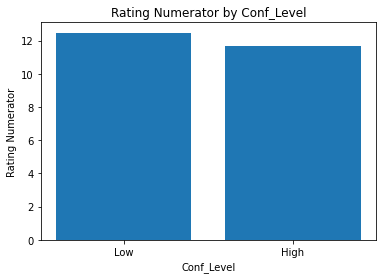

In [84]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Rating Numerator by Conf_Level')
plt.xlabel('Conf_Level')
plt.ylabel('Rating Numerator');

#### 2. The most popular tweeter account name 2015?

In [85]:
tweet_pop_2015 = twitter_archive_master.loc[twitter_archive_master.date == '2015-11-28']

In [86]:
tweet_pop_2015.head()

,tweet_id,rating_numerator,rating_denominator,name,date,dog_stages,stage_level,img_num,test_level,animal,...,conf_level,pos,positivity,truncated,total_text_count,retweet_count,favorite_count,favorited,retweeted,lang
137878,670733412878163972,8.0,10.0,jerry,2015-11-28,doggo,None,1.0,p1,dhole,...,0.350416,p1_dog,False,False,124,558,1030,False,False,en
137879,670733412878163972,8.0,10.0,jerry,2015-11-28,doggo,None,1.0,p2,hare,...,0.350416,p1_dog,False,False,124,558,1030,False,False,en
137880,670733412878163972,8.0,10.0,jerry,2015-11-28,doggo,None,1.0,p3,wood_rabbit,...,0.350416,p1_dog,False,False,124,558,1030,False,False,en
137881,670733412878163972,8.0,10.0,jerry,2015-11-28,doggo,None,1.0,p1,dhole,...,0.236661,p1_dog,False,False,124,558,1030,False,False,en
137882,670733412878163972,8.0,10.0,jerry,2015-11-28,doggo,None,1.0,p2,hare,...,0.236661,p1_dog,False,False,124,558,1030,False,False,en


In [87]:
stat_tweet_2015 = tweet_pop_2015.groupby('name')[['retweet_count']].mean()

In [88]:
stat_tweet_2015

,retweet_count
name,
bloo,45.0
damon,342.0
danny,405.0
edd,90.0
ester,266.0
hank,708.0
herb,709.0
jeffrie,403.0
jerry,558.0


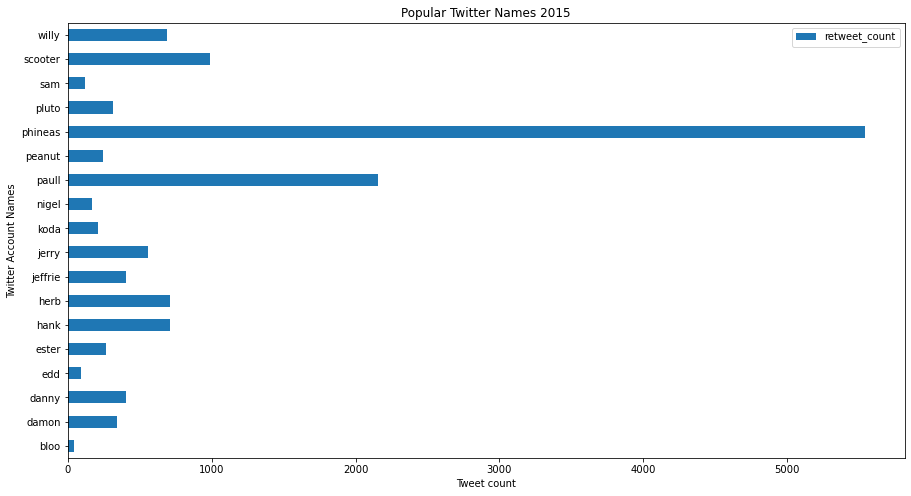

In [89]:
stat_tweet_2015.plot(kind='barh', figsize=(15, 8)); #plots barh chart of revenue diffrence of 1972 through 2015
plt.title("Popular Twitter Names 2015")
plt.xlabel("Tweet count")
plt.ylabel("Twitter Account Names");

#### 3. How much has test_level performance from 2015 - 2017?

In [90]:
test_level_2015 = twitter_archive_master.loc[twitter_archive_master.date == '2015-11-28']

In [91]:
test_level_2015.head()

,tweet_id,rating_numerator,rating_denominator,name,date,dog_stages,stage_level,img_num,test_level,animal,...,conf_level,pos,positivity,truncated,total_text_count,retweet_count,favorite_count,favorited,retweeted,lang
137878,670733412878163972,8.0,10.0,jerry,2015-11-28,doggo,None,1.0,p1,dhole,...,0.350416,p1_dog,False,False,124,558,1030,False,False,en
137879,670733412878163972,8.0,10.0,jerry,2015-11-28,doggo,None,1.0,p2,hare,...,0.350416,p1_dog,False,False,124,558,1030,False,False,en
137880,670733412878163972,8.0,10.0,jerry,2015-11-28,doggo,None,1.0,p3,wood_rabbit,...,0.350416,p1_dog,False,False,124,558,1030,False,False,en
137881,670733412878163972,8.0,10.0,jerry,2015-11-28,doggo,None,1.0,p1,dhole,...,0.236661,p1_dog,False,False,124,558,1030,False,False,en
137882,670733412878163972,8.0,10.0,jerry,2015-11-28,doggo,None,1.0,p2,hare,...,0.236661,p1_dog,False,False,124,558,1030,False,False,en


In [92]:
stat_level_2015 = tweet_pop_2015.groupby('test_level')[['conf_level']].mean()

In [93]:
stat_level_2015.head()

,conf_level
test_level,
p1,0.237501
p2,0.237501
p3,0.237501


In [94]:
stat_level_2017 = twitter_archive_master.loc[twitter_archive_master.date == '2017-06-28']

In [95]:
stat_level_2017.head()

,tweet_id,rating_numerator,rating_denominator,name,date,dog_stages,stage_level,img_num,test_level,animal,...,conf_level,pos,positivity,truncated,total_text_count,retweet_count,favorite_count,favorited,retweeted,lang
4877,879862464715927552,13.0,10.0,romeo,2017-06-28,doggo,None,3.0,p1,basset,...,0.813507,p1_dog,True,False,91,3642,22667,False,False,en
4878,879862464715927552,13.0,10.0,romeo,2017-06-28,doggo,None,3.0,p2,beagle,...,0.813507,p1_dog,True,False,91,3642,22667,False,False,en
4879,879862464715927552,13.0,10.0,romeo,2017-06-28,doggo,None,3.0,p3,cocker_spaniel,...,0.813507,p1_dog,True,False,91,3642,22667,False,False,en
4880,879862464715927552,13.0,10.0,romeo,2017-06-28,doggo,None,3.0,p1,basset,...,0.146654,p1_dog,True,False,91,3642,22667,False,False,en
4881,879862464715927552,13.0,10.0,romeo,2017-06-28,doggo,None,3.0,p2,beagle,...,0.146654,p1_dog,True,False,91,3642,22667,False,False,en


In [96]:
stat_level_2017 = stat_level_2017.groupby('test_level')[['conf_level']].mean()

In [97]:
stat_level_2017.head()

,conf_level
test_level,
p1,0.323215
p2,0.323215
p3,0.323215


In [98]:
find_stat = stat_level_2017 - stat_level_2015

In [99]:
find_stat

,conf_level
test_level,
p1,0.085714
p2,0.085714
p3,0.085714


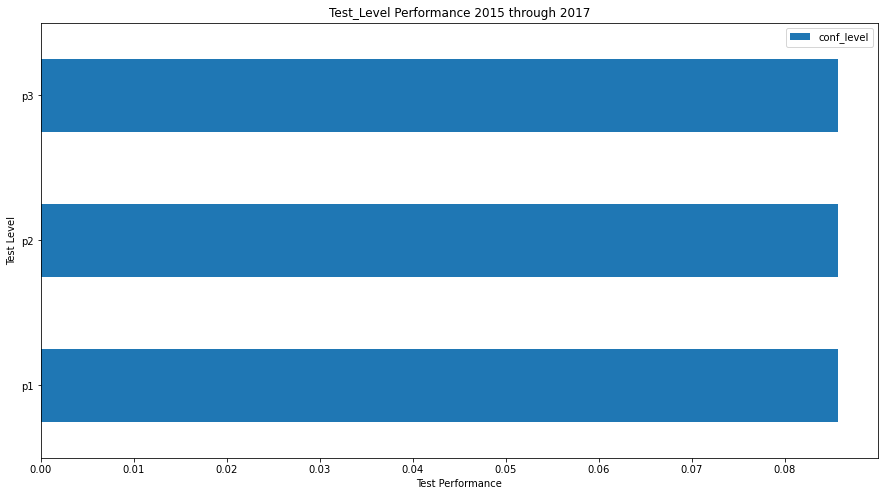

In [100]:
# plots barh chart of Test_Level Performance diffrence of 2015 through 2017
find_stat.plot(kind='barh', figsize=(15, 8));
plt.title("Test_Level Performance 2015 through 2017")
plt.xlabel("Test Performance")
plt.ylabel("Test Level");